In [7]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

from util import *
import torch
from heuristic.heuristic_solver import HeuristicSolver
from nce_model import NCEModel
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 0. Load data

In [2]:
data = [parse_datafile(f'../data/reduced/cvrp_10000_100_5/instance_{i}') for i in tqdm(range(1000))]

TRAIN_PERCENTAGE, VALIDATION_PERCENTAGE, TEST_PERCENTAGE = 0.75, 0.05, 0.20
num_train, num_val, num_test = int(len(data) * TRAIN_PERCENTAGE), int(len(data) * VALIDATION_PERCENTAGE), int(len(data) * TEST_PERCENTAGE)
vrps_train, vrps_val, vrps_test = data[:num_train], data[num_train:num_train + num_val], data[num_train + num_val:]
print(f'Number of training instances: {len(vrps_train)}, validation instances: {len(vrps_val)}, test instances: {len(vrps_test)}')

100%|██████████| 1000/1000 [01:09<00:00, 14.46it/s]

Number of training instances: 750, validation instances: 50, test instances: 200


# 1. 2-stage model

Epoch 0: Train Loss: 31976558.11543338 | Validation Loss: 28583401.240477838
Epoch 1: Train Loss: 31511573.79305797 | Validation Loss: 28128160.1310307
Epoch 2: Train Loss: 31062072.93265176 | Validation Loss: 27714854.20070839
Epoch 3: Train Loss: 30678623.58911531 | Validation Loss: 27350966.55048188
Epoch 4: Train Loss: 30336480.631724052 | Validation Loss: 27033852.13279086
Epoch 5: Train Loss: 30040564.297684003 | Validation Loss: 26762877.45968952
Epoch 6: Train Loss: 29788393.611801047 | Validation Loss: 26533117.499913435
Epoch 7: Train Loss: 29577387.4286231 | Validation Loss: 26335821.710295476
Epoch 8: Train Loss: 29405379.11590185 | Validation Loss: 26178545.967797782
Epoch 9: Train Loss: 29260437.420082882 | Validation Loss: 26051899.94736842
Epoch 10: Train Loss: 29152674.84101036 | Validation Loss: 25953127.17861265
Epoch 11: Train Loss: 29067636.193364065 | Validation Loss: 25884639.256232686
Epoch 12: Train Loss: 28999640.651480637 | Validation Loss: 25829400.533760387

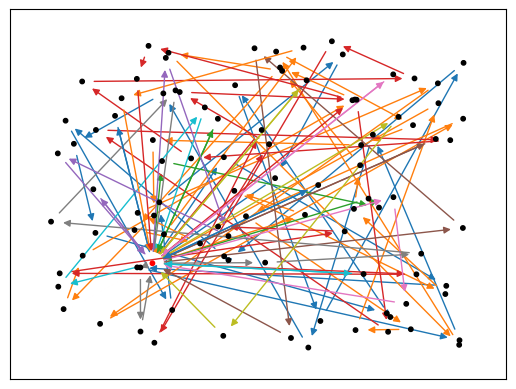

Drawing predicted solution


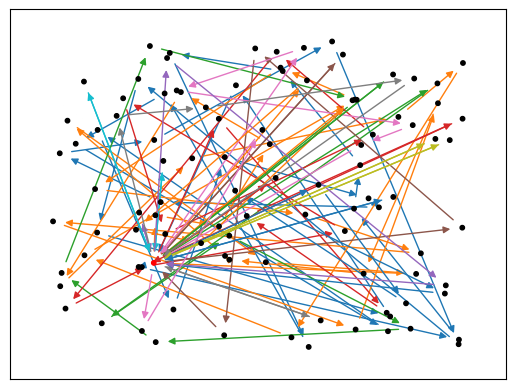

Actual edges (120): [0 -> 2, 0 -> 11, 0 -> 21, 0 -> 23, 0 -> 24, 0 -> 27, 0 -> 30, 0 -> 31, 0 -> 36, 0 -> 47, 0 -> 48, 0 -> 49, 0 -> 51, 0 -> 52, 0 -> 56, 0 -> 67, 0 -> 68, 0 -> 81, 0 -> 83, 0 -> 87, 0 -> 92, 1 -> 73, 2 -> 0, 3 -> 45, 4 -> 86, 5 -> 65, 6 -> 59, 7 -> 80, 8 -> 46, 9 -> 18, 10 -> 4, 11 -> 0, 12 -> 0, 13 -> 0, 14 -> 76, 15 -> 97, 16 -> 35, 17 -> 40, 18 -> 98, 19 -> 28, 20 -> 6, 21 -> 32, 22 -> 9, 23 -> 0, 24 -> 62, 25 -> 96, 26 -> 55, 27 -> 88, 28 -> 50, 29 -> 7, 30 -> 5, 31 -> 12, 32 -> 19, 33 -> 85, 34 -> 37, 35 -> 0, 36 -> 39, 37 -> 25, 38 -> 0, 39 -> 0, 40 -> 77, 41 -> 33, 42 -> 66, 43 -> 29, 44 -> 15, 45 -> 90, 46 -> 0, 47 -> 61, 48 -> 17, 49 -> 0, 50 -> 44, 51 -> 84, 52 -> 0, 53 -> 99, 54 -> 78, 55 -> 0, 56 -> 95, 57 -> 41, 58 -> 89, 59 -> 43, 60 -> 82, 61 -> 38, 62 -> 63, 63 -> 0, 64 -> 54, 65 -> 69, 66 -> 14, 67 -> 0, 68 -> 1, 69 -> 0, 70 -> 91, 71 -> 0, 72 -> 22, 73 -> 0, 74 -> 0, 75 -> 58, 76 -> 75, 77 -> 93, 78 -> 57, 79 -> 3, 80 -> 16, 81 -> 71, 82 -> 72, 83 ->

100%|██████████| 200/200 [00:20<00:00,  9.89it/s]

Accuracy: 0.20627490792221168, cost comparison: 6.003534861342556, regret: 170295.39948368428


In [6]:
from two_stage_model import TwoStageModel
model = TwoStageModel(vrps_train, vrps_val, vrps_test, lr=1e-2)
model.train(num_epochs=20)
model.test()
test_and_draw(model, vrps_test[0])
test(model, vrps_test, GurobiSolver)

# 2a. SPO+ model (using true costs during training)

In [7]:
from spo_model import SPOModel
spo_model = SPOModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-2)
spo_model.train(epochs=30, verbose=False, test_every=1)

750it [01:06, 11.33it/s]


Epoch 1 / 30 done, mean loss: 679928.2268333334, validation loss: 681013.375


100%|██████████| 200/200 [00:17<00:00, 11.34it/s]


Accuracy: 0.1924231853144143, cost comparison: 6.464682558187527, regret: 185990.56968464184


750it [01:03, 11.76it/s]


Epoch 2 / 30 done, mean loss: 672557.6871666666, validation loss: 681172.0


100%|██████████| 200/200 [00:12<00:00, 15.90it/s]


Accuracy: 0.20461658842121316, cost comparison: 6.041933203385497, regret: 171602.287749465


750it [01:08, 10.97it/s]


Epoch 3 / 30 done, mean loss: 662491.146, validation loss: 681662.375


100%|██████████| 200/200 [00:17<00:00, 11.18it/s]


Accuracy: 0.20486093327300575, cost comparison: 6.05366079654692, regret: 172001.43659478187


82it [00:05, 13.76it/s]

KeyboardInterrupt



In [8]:
spo_model.cost_model.eval()
vrp = vrps_test[2]
costs = spo_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

NameError: name 'spo_model' is not defined

In [10]:
# export the model
torch.save(spo_model.cost_model.state_dict(), '../models/spo_model.pt')

# 2b. SPO+ model (without using true costs during training)

In [9]:
from spo_model import SPOModelNoTrueCosts

spo_model_no_true_costs = SPOModelNoTrueCosts(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-2)
spo_model_no_true_costs.train(epochs=20, verbose=False, test_every=1)

750it [00:56, 13.38it/s]


Epoch 1 / 20 done, mean loss: -31310.017203125, validation loss: -32390.67578125


100%|██████████| 200/200 [00:14<00:00, 13.37it/s]


Accuracy: 0.19540694856513283, cost comparison: 6.7686577583329495, regret: 196336.37111831203


750it [01:02, 12.03it/s]


Epoch 2 / 20 done, mean loss: -35280.82681770833, validation loss: -32352.16796875


100%|██████████| 200/200 [00:14<00:00, 14.19it/s]


Accuracy: 0.20042539909071277, cost comparison: 6.454252555000628, regret: 185635.584337572


750it [00:52, 14.41it/s]


Epoch 3 / 20 done, mean loss: -37097.42126822917, validation loss: -32327.564453125


100%|██████████| 200/200 [00:12<00:00, 15.89it/s]


Accuracy: 0.20020194837017438, cost comparison: 6.435727604267397, regret: 185005.0873043836


750it [00:56, 13.27it/s]


Epoch 4 / 20 done, mean loss: -37442.782942708334, validation loss: -32265.32421875


100%|██████████| 200/200 [00:14<00:00, 14.22it/s]


Accuracy: 0.19835547349943294, cost comparison: 6.464926876172731, regret: 185998.88505168617


750it [00:57, 13.11it/s]


Epoch 5 / 20 done, mean loss: -37664.40686458333, validation loss: -32164.4765625


 24%|██▍       | 49/200 [00:03<00:11, 12.75it/s]


Interrupt request received




KeyboardInterrupt



In [9]:
spo_model_no_true_costs.cost_model.eval()
vrp = vrps_test[0]
costs = spo_model_no_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

NameError: name 'spo_model_no_true_costs' is not defined

# 3a. NCE model (without using true costs during training)

In [3]:
nce_model = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-3)
nce_model.train(epochs=50, verbose=False, test_every=2)

0it [00:00, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16


750it [00:32, 23.12it/s]


Epoch 1 / 50 done, mean loss: 103.59691414388021


750it [00:32, 22.74it/s]


Epoch 2 / 50 done, mean loss: -216.9291098836263


100%|██████████| 200/200 [00:12<00:00, 15.80it/s]


Accuracy: 0.19504717517881998, cost comparison: 6.564714918308372, regret: 189395.1728702192


750it [00:25, 28.89it/s]


Epoch 3 / 50 done, mean loss: -953.801831604004


750it [00:29, 25.61it/s]


Epoch 4 / 50 done, mean loss: -1772.195762898763


100%|██████████| 200/200 [00:11<00:00, 17.38it/s]


Accuracy: 0.19770530454481913, cost comparison: 6.388442329081926, regret: 183395.73210839636


750it [00:27, 27.15it/s]


Epoch 5 / 50 done, mean loss: -2789.415751946767


750it [00:28, 26.56it/s]


Epoch 6 / 50 done, mean loss: -3869.6372541224164


100%|██████████| 200/200 [00:12<00:00, 16.02it/s]


Accuracy: 0.20177741592653903, cost comparison: 6.332543451875033, regret: 181493.21281185176


750it [00:30, 24.79it/s]


Epoch 7 / 50 done, mean loss: -4980.253663419087


750it [00:28, 26.68it/s]


Epoch 8 / 50 done, mean loss: -6109.213074442546


100%|██████████| 200/200 [00:12<00:00, 15.95it/s]


Accuracy: 0.2015690173191868, cost comparison: 6.361153859317253, regret: 182466.96854650372


750it [00:29, 25.47it/s]


Epoch 9 / 50 done, mean loss: -7249.175414713542


750it [00:29, 25.45it/s]


Epoch 10 / 50 done, mean loss: -8393.876700398763


100%|██████████| 200/200 [00:12<00:00, 16.02it/s]


Accuracy: 0.2018599631696287, cost comparison: 6.406572603417605, regret: 184012.79632325706


750it [00:28, 26.43it/s]


Epoch 11 / 50 done, mean loss: -9542.405224812826


750it [00:28, 26.62it/s]


Epoch 12 / 50 done, mean loss: -10688.738869384766


100%|██████████| 200/200 [00:11<00:00, 17.25it/s]


Accuracy: 0.20188971548395776, cost comparison: 6.370798268525408, regret: 182795.21618830133


117it [00:03, 37.92it/s]

KeyboardInterrupt



Actual objective: 39551.058415746586


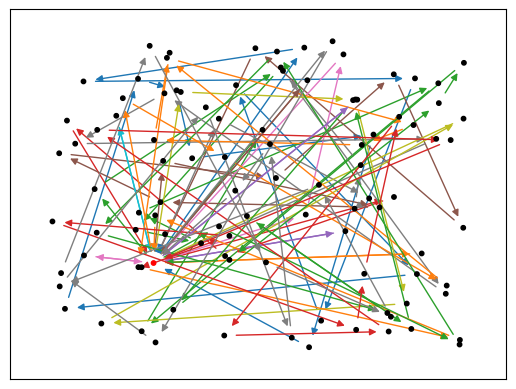

Predicted objective: 190699.37612869948


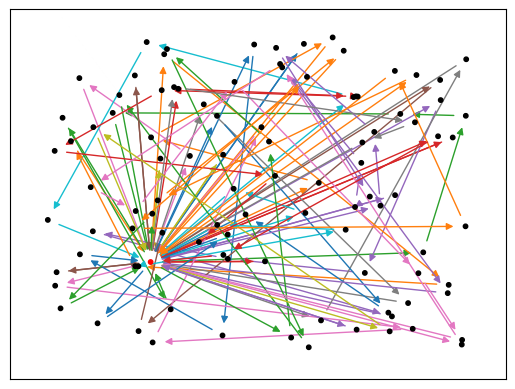

In [10]:
nce_model.cost_model.eval()
vrp = vrps_test[0]
costs = nce_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 3b. NCE model (using true costs during training)

In [4]:
from nce_model import NCETrueCostLoss

nce_model_true_costs = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
nce_model_true_costs.criterion = NCETrueCostLoss({vrp: [vrp.actual_solution] for vrp in vrps_train})
nce_model_true_costs.train(epochs=40, verbose=False, test_every=1)

750it [00:29, 25.79it/s]


Epoch 1 / 40 done, mean loss: 106152.65473058951


100%|██████████| 200/200 [00:10<00:00, 19.09it/s]


Accuracy: 0.19708650911291847, cost comparison: 6.6015988226441555, regret: 190650.51722125185


750it [00:29, 25.39it/s]


Epoch 2 / 40 done, mean loss: 157642.45827893727


100%|██████████| 200/200 [00:12<00:00, 15.80it/s]


Accuracy: 0.19624676724142456, cost comparison: 6.553438208460401, regret: 189011.3698466292


750it [00:26, 28.74it/s]


Epoch 3 / 40 done, mean loss: 186672.86741856846


100%|██████████| 200/200 [00:11<00:00, 18.13it/s]


Accuracy: 0.19619619881429148, cost comparison: 6.420197994177669, regret: 184476.53674416116


750it [00:28, 26.14it/s]


Epoch 4 / 40 done, mean loss: 198039.0749353105


100%|██████████| 200/200 [00:13<00:00, 14.87it/s]


Accuracy: 0.20023871810926042, cost comparison: 6.474869534747001, regret: 186337.28361605242


750it [00:23, 31.94it/s]


Epoch 5 / 40 done, mean loss: 202950.0031413336


100%|██████████| 200/200 [00:13<00:00, 14.37it/s]


Accuracy: 0.20078937350979054, cost comparison: 6.482342927854144, regret: 186591.64068559383


750it [00:24, 30.78it/s]


Epoch 6 / 40 done, mean loss: 203568.42139073706


100%|██████████| 200/200 [00:13<00:00, 14.96it/s]


Accuracy: 0.200368019237167, cost comparison: 6.507835881446555, regret: 187459.2938220952


750it [00:30, 24.72it/s]


Epoch 7 / 40 done, mean loss: 200147.4433205134


100%|██████████| 200/200 [00:12<00:00, 15.73it/s]


Accuracy: 0.20204070668231178, cost comparison: 6.441255480472919, regret: 185193.22867099792


750it [00:27, 27.23it/s]


Epoch 8 / 40 done, mean loss: 195626.29759776234


100%|██████████| 200/200 [00:13<00:00, 15.18it/s]


Accuracy: 0.20371305076880616, cost comparison: 6.4775920215708025, regret: 186429.9435043308


750it [00:26, 28.39it/s]


Epoch 9 / 40 done, mean loss: 189617.98318068322


100%|██████████| 200/200 [00:13<00:00, 14.74it/s]


Accuracy: 0.2035392330608269, cost comparison: 6.429904554505846, regret: 184806.89970045205


750it [00:28, 26.34it/s]


Epoch 10 / 40 done, mean loss: 182921.381476709


100%|██████████| 200/200 [00:13<00:00, 15.34it/s]


Accuracy: 0.20350914347086874, cost comparison: 6.39747939369513, regret: 183703.30876592197


750it [00:27, 27.13it/s]


Epoch 11 / 40 done, mean loss: 175765.88619310132


100%|██████████| 200/200 [00:11<00:00, 17.05it/s]


Accuracy: 0.20383025501356491, cost comparison: 6.415802504874273, regret: 184326.93618623714


750it [00:28, 26.70it/s]


Epoch 12 / 40 done, mean loss: 168682.14955237383


100%|██████████| 200/200 [00:12<00:00, 16.06it/s]


Accuracy: 0.20299280133345302, cost comparison: 6.460465340949791, regret: 185847.03661969642


750it [00:28, 26.27it/s]


Epoch 13 / 40 done, mean loss: 161251.69653599305


100%|██████████| 200/200 [00:12<00:00, 16.18it/s]


Accuracy: 0.2041124500059494, cost comparison: 6.462208419564989, regret: 185906.36233188413


750it [00:28, 25.87it/s]


Epoch 14 / 40 done, mean loss: 153703.17049997815


100%|██████████| 200/200 [00:14<00:00, 13.38it/s]


Accuracy: 0.20459362550329718, cost comparison: 6.498642234699182, regret: 187146.38788880178


750it [00:26, 28.02it/s]


Epoch 15 / 40 done, mean loss: 146233.22820265326


100%|██████████| 200/200 [00:13<00:00, 15.02it/s]


Accuracy: 0.20315386990271506, cost comparison: 6.415245180882557, regret: 184307.9676541011


750it [00:25, 29.46it/s]


Epoch 16 / 40 done, mean loss: 138394.62279880414


100%|██████████| 200/200 [00:13<00:00, 15.03it/s]


Accuracy: 0.20311337564650256, cost comparison: 6.387669826924309, regret: 183369.43998349286


750it [00:30, 24.67it/s]


Epoch 17 / 40 done, mean loss: 130668.83018507439


100%|██████████| 200/200 [00:14<00:00, 13.92it/s]


Accuracy: 0.2025821964134805, cost comparison: 6.406271356302142, regret: 184002.54337223485


750it [00:31, 24.14it/s]


Epoch 18 / 40 done, mean loss: 122992.09416635036


100%|██████████| 200/200 [00:13<00:00, 14.70it/s]


Accuracy: 0.20393976822705637, cost comparison: 6.374069014680818, regret: 182906.5360928448


750it [00:28, 26.04it/s]


Epoch 19 / 40 done, mean loss: 115117.34059289811


100%|██████████| 200/200 [00:12<00:00, 16.25it/s]


Accuracy: 0.2034721479045917, cost comparison: 6.363520931858572, regret: 182547.53190325064


750it [00:29, 25.73it/s]


Epoch 20 / 40 done, mean loss: 107249.12405620249


100%|██████████| 200/200 [00:12<00:00, 15.72it/s]


Accuracy: 0.2044071099173207, cost comparison: 6.343781209475467, regret: 181875.69009499237


750it [00:30, 24.21it/s]


Epoch 21 / 40 done, mean loss: 99337.36538410834


100%|██████████| 200/200 [00:11<00:00, 16.96it/s]


Accuracy: 0.20568121352296437, cost comparison: 6.367810396948318, regret: 182693.52392514574


750it [00:29, 25.70it/s]


Epoch 22 / 40 done, mean loss: 91407.5163608958


100%|██████████| 200/200 [00:09<00:00, 20.02it/s]


Accuracy: 0.20492817088726129, cost comparison: 6.330529668783396, regret: 181424.67366791304


750it [00:26, 27.78it/s]


Epoch 23 / 40 done, mean loss: 83449.60704134114


100%|██████████| 200/200 [00:13<00:00, 14.60it/s]


Accuracy: 0.2044681409902701, cost comparison: 6.352775400072435, regret: 182181.80753460043


750it [00:29, 25.29it/s]


Epoch 24 / 40 done, mean loss: 75499.73139848956


100%|██████████| 200/200 [00:12<00:00, 15.67it/s]


Accuracy: 0.20440104246089802, cost comparison: 6.383658663369492, regret: 183232.91995937141


750it [00:30, 24.32it/s]


Epoch 25 / 40 done, mean loss: 67642.61327815753


100%|██████████| 200/200 [00:13<00:00, 14.81it/s]


Accuracy: 0.20430716728709425, cost comparison: 6.404928712313106, regret: 183956.84645978935


750it [00:29, 25.46it/s]


Epoch 26 / 40 done, mean loss: 59731.62263185417


100%|██████████| 200/200 [00:11<00:00, 17.80it/s]


Accuracy: 0.20391934466953, cost comparison: 6.4020260094103545, regret: 183858.05291400518


750it [00:27, 26.92it/s]


Epoch 27 / 40 done, mean loss: 51805.058567105014


100%|██████████| 200/200 [00:13<00:00, 15.26it/s]


Accuracy: 0.20297950200477982, cost comparison: 6.4081171334467415, regret: 184065.3644307282


750it [00:28, 26.39it/s]


Epoch 28 / 40 done, mean loss: 43844.20609580768


100%|██████████| 200/200 [00:13<00:00, 14.72it/s]


Accuracy: 0.20440942707726745, cost comparison: 6.392269842478362, regret: 183526.00159605616


750it [00:28, 26.07it/s]


Epoch 29 / 40 done, mean loss: 35784.387468600464


100%|██████████| 200/200 [00:12<00:00, 16.55it/s]


Accuracy: 0.2050246198601135, cost comparison: 6.3643365565991274, regret: 182575.29170604458


750it [00:29, 25.02it/s]


Epoch 30 / 40 done, mean loss: 27815.126894789933


100%|██████████| 200/200 [00:13<00:00, 14.76it/s]


Accuracy: 0.2036788620266281, cost comparison: 6.337816689115282, regret: 181672.68753667854


750it [00:31, 23.99it/s]


Epoch 31 / 40 done, mean loss: 19745.530788130756


100%|██████████| 200/200 [00:10<00:00, 18.88it/s]


Accuracy: 0.2035761158784336, cost comparison: 6.415141188021168, regret: 184304.4282551834


750it [00:30, 24.27it/s]


Epoch 32 / 40 done, mean loss: 11706.658471378769


100%|██████████| 200/200 [00:13<00:00, 15.35it/s]


Accuracy: 0.20478707391280643, cost comparison: 6.3722977473313565, regret: 182846.25097657647


750it [00:29, 25.32it/s]


Epoch 33 / 40 done, mean loss: 3611.7263193398603


100%|██████████| 200/200 [00:12<00:00, 15.57it/s]


Accuracy: 0.2046269837156699, cost comparison: 6.36164569567467, regret: 182483.70820582245


750it [00:30, 24.84it/s]


Epoch 34 / 40 done, mean loss: -4440.71563932975


100%|██████████| 200/200 [00:12<00:00, 16.21it/s]


Accuracy: 0.20414536128268765, cost comparison: 6.383538818691845, regret: 183228.84104360078


750it [00:27, 27.01it/s]


Epoch 35 / 40 done, mean loss: -12484.712744650933


100%|██████████| 200/200 [00:11<00:00, 17.16it/s]


Accuracy: 0.20317668314890064, cost comparison: 6.428303838771736, regret: 184752.4193114966


750it [00:29, 25.75it/s]


Epoch 36 / 40 done, mean loss: -20519.85235451959


100%|██████████| 200/200 [00:10<00:00, 18.82it/s]


Accuracy: 0.2031450884164748, cost comparison: 6.371713074571452, regret: 182826.3516286207


750it [00:30, 24.73it/s]


Epoch 37 / 40 done, mean loss: -28545.833335511335


100%|██████████| 200/200 [00:12<00:00, 16.12it/s]


Accuracy: 0.204244555566766, cost comparison: 6.367737375189475, regret: 182691.0386282634


750it [00:32, 22.91it/s]


Epoch 38 / 40 done, mean loss: -36580.98086753759


100%|██████████| 200/200 [00:12<00:00, 15.44it/s]


Accuracy: 0.20439304311401763, cost comparison: 6.406631116258743, regret: 184014.78780886327


750it [00:29, 25.50it/s]


Epoch 39 / 40 done, mean loss: -44639.47888522068


100%|██████████| 200/200 [00:12<00:00, 15.39it/s]


Accuracy: 0.20483463933795573, cost comparison: 6.351261102797881, regret: 182130.26839947834


750it [00:27, 26.93it/s]


Epoch 40 / 40 done, mean loss: -52701.468367993184


100%|██████████| 200/200 [00:12<00:00, 16.60it/s]

Accuracy: 0.20355935780482481, cost comparison: 6.398742695983219, regret: 183746.30528214123


Actual objective: 31417.167470642435


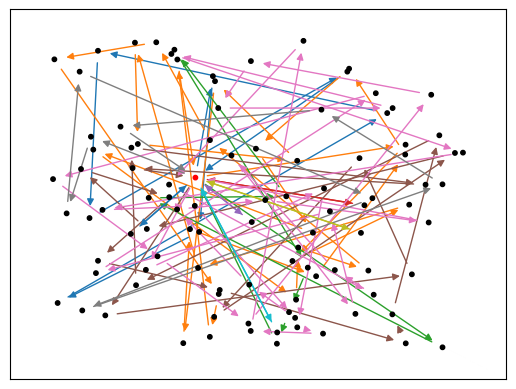

Predicted objective: 31417.167470642435


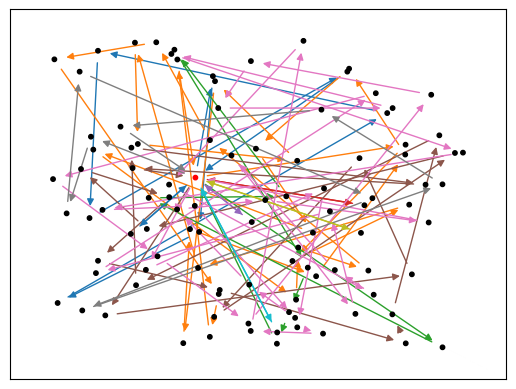

In [6]:
nce_model_true_costs.cost_model.eval()
vrp = vrps_train[0]
costs = nce_model_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)